In [60]:
#import libraries
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

In [61]:
#load dataset
train= pd.read_csv('C:/Users/mahsa/Desktop/mahsa dataset 9th feb.csv')

In [62]:
#summarize first few lines
train.head()

,NPs,Coating,Core_size,Shape,Dose,Class,Family,Species,Duration,ZOI
0,AgNPs,Uncoated,68.0,crystalline,25000.0,Gammaproteobacteria,Enterobacteriaceae,E. coli,24,9.2
1,AgNPs,Uncoated,68.0,crystalline,25000.0,Gammaproteobacteria,Pseudomonadaceae,P. aeruginosa,24,10.0
2,AgNPs,Uncoated,68.0,crystalline,25000.0,Gammaproteobacteria,Enterobacteriaceae,Salmonella,24,9.1
3,AgNPs,Uncoated,68.0,crystalline,25000.0,Bacilli,Staphylococcaceae,S. aureus,24,10.1
4,AgNPs,Uncoated,68.0,crystalline,25000.0,Bacilli,Enterococcaceae,Enterococcus,24,8.0


In [63]:
train.columns

Index(['NPs', 'Coating', 'Core_size', 'Shape', 'Dose', 'Class', 'Family',
       'Species', 'Duration', 'ZOI'],
      dtype='object')

In [64]:
#summarize shape
print(train.shape)

(436, 10)


In [6]:
# missing values
train.isnull()

,NPs,Coating,Core_size,Shape,Dose,Class,Family,Species,Duration,ZOI
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
431,False,False,False,False,True,False,False,False,False,False
432,False,False,False,False,True,False,False,False,False,False
433,False,False,False,False,True,False,False,False,False,False
434,False,False,False,False,True,False,False,False,False,False


In [7]:
# One-hot encode the data using pandas get_dummies
pd.get_dummies(train['NPs'])

,AgNPs,Fe3O4,ZNO
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
431,0,0,1
432,0,0,1
433,0,0,1
434,0,0,1


In [8]:
pd.get_dummies(train['Shape'])

,Hexagonal,Rod,Spherical,crystalline,cubic
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
431,0,0,1,0,0
432,0,0,1,0,0
433,0,0,1,0,0
434,0,0,1,0,0


In [9]:
pd.get_dummies(train['Species'])

,A. niger,A. terreus,Aspergillus,B. brevis,B. cereus,B. licheniformis,B. subtilis,C. albican,C. tropicali,E. aerogenes,...,S. epidermidis,S. marcescens,S. paratyphi,S. typhi,Salmonella,Scedosporium,Shigella,V. cholerae,X. oryzae,Xanthomonas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
nps = pd.get_dummies(train['NPs'])

In [11]:
coat = pd.get_dummies(train['Coating'],drop_first=True)

In [12]:
bact = pd.get_dummies(train['Species'])

In [13]:
shape= pd.get_dummies(train['Shape'])

In [14]:
#substitute the new intrroduced features
train =pd.concat([pd.read_csv('C:/Users/mahsa/Desktop/mahsa dataset 9th feb.csv'),nps,coat,bact,shape],axis=1)

In [15]:
train.columns

Index(['NPs', 'Coating', 'Core_size', 'Shape', 'Dose', 'Class', 'Family',
       'Species', 'Duration', 'ZOI', 'AgNPs', 'Fe3O4', 'ZNO', 'Uncoated',
       'A. niger', 'A. terreus', 'Aspergillus', 'B. brevis', 'B. cereus',
       'B. licheniformis', 'B. subtilis', 'C. albican', 'C. tropicali',
       'E. aerogenes', 'E. coli', 'E. faecalis ', 'Enterococcus', 'F. solani',
       'Fusarium', 'Ganoderma', 'K. pneumoniae', 'L. monocytogenes',
       'P. aeruginosa', 'P. mirabilis', 'P. multocida', 'P. putida',
       'P. vulgaris', 'Penicillium', 'S. aureus', 'S. dysenteriae',
       'S. epidermidis', 'S. marcescens', 'S. paratyphi', 'S. typhi',
       'Salmonella', 'Scedosporium', 'Shigella', 'V. cholerae', 'X. oryzae',
       'Xanthomonas', 'Hexagonal', 'Rod', 'Spherical', 'crystalline', 'cubic'],
      dtype='object')

In [16]:
train.head()

,NPs,Coating,Core_size,Shape,Dose,Class,Family,Species,Duration,ZOI,...,Scedosporium,Shigella,V. cholerae,X. oryzae,Xanthomonas,Hexagonal,Rod,Spherical,crystalline,cubic
0,AgNPs,Uncoated,68.0,crystalline,25000.0,Gammaproteobacteria,Enterobacteriaceae,E. coli,24,9.2,...,0,0,0,0,0,0,0,0,1,0
1,AgNPs,Uncoated,68.0,crystalline,25000.0,Gammaproteobacteria,Pseudomonadaceae,P. aeruginosa,24,10.0,...,0,0,0,0,0,0,0,0,1,0
2,AgNPs,Uncoated,68.0,crystalline,25000.0,Gammaproteobacteria,Enterobacteriaceae,Salmonella,24,9.1,...,0,0,0,0,0,0,0,0,1,0
3,AgNPs,Uncoated,68.0,crystalline,25000.0,Bacilli,Staphylococcaceae,S. aureus,24,10.1,...,0,0,0,0,0,0,0,0,1,0
4,AgNPs,Uncoated,68.0,crystalline,25000.0,Bacilli,Enterococcaceae,Enterococcus,24,8.0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# Remove features
train.drop(['NPs', 'Coating', 'Shape'],axis=1,inplace=True)

In [18]:
train.head()

,Core_size,Dose,Class,Family,Species,Duration,ZOI,AgNPs,Fe3O4,ZNO,...,Scedosporium,Shigella,V. cholerae,X. oryzae,Xanthomonas,Hexagonal,Rod,Spherical,crystalline,cubic
0,68.0,25000.0,Gammaproteobacteria,Enterobacteriaceae,E. coli,24,9.2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,68.0,25000.0,Gammaproteobacteria,Pseudomonadaceae,P. aeruginosa,24,10.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,68.0,25000.0,Gammaproteobacteria,Enterobacteriaceae,Salmonella,24,9.1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,68.0,25000.0,Bacilli,Staphylococcaceae,S. aureus,24,10.1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,68.0,25000.0,Bacilli,Enterococcaceae,Enterococcus,24,8.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
train.drop(['Species'],axis=1,inplace=True)

In [20]:
train.drop(['Class'],axis=1,inplace=True)

In [21]:
train.drop(['Family'],axis=1,inplace=True)

In [22]:
train['Duration'] = pd.to_numeric(train['Duration'], downcast='float')

In [23]:
train['Dose'] = pd.to_numeric(train['Dose'], downcast='float')

In [24]:
train['Core_size'] = pd.to_numeric(train['Core_size'], downcast='float')

In [25]:
train.head()

,Core_size,Dose,Duration,ZOI,AgNPs,Fe3O4,ZNO,Uncoated,A. niger,A. terreus,...,Scedosporium,Shigella,V. cholerae,X. oryzae,Xanthomonas,Hexagonal,Rod,Spherical,crystalline,cubic
0,68.0,25000.0,24.0,9.2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,68.0,25000.0,24.0,10.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,68.0,25000.0,24.0,9.1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,68.0,25000.0,24.0,10.1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,68.0,25000.0,24.0,8.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
train.columns

Index(['Core_size', 'Dose', 'Duration', 'ZOI', 'AgNPs', 'Fe3O4', 'ZNO',
       'Uncoated', 'A. niger', 'A. terreus', 'Aspergillus', 'B. brevis',
       'B. cereus', 'B. licheniformis', 'B. subtilis', 'C. albican',
       'C. tropicali', 'E. aerogenes', 'E. coli', 'E. faecalis ',
       'Enterococcus', 'F. solani', 'Fusarium', 'Ganoderma', 'K. pneumoniae',
       'L. monocytogenes', 'P. aeruginosa', 'P. mirabilis', 'P. multocida',
       'P. putida', 'P. vulgaris', 'Penicillium', 'S. aureus',
       'S. dysenteriae', 'S. epidermidis', 'S. marcescens', 'S. paratyphi',
       'S. typhi', 'Salmonella', 'Scedosporium', 'Shigella', 'V. cholerae',
       'X. oryzae', 'Xanthomonas', 'Hexagonal', 'Rod', 'Spherical',
       'crystalline', 'cubic'],
      dtype='object')

In [27]:
# drop the rows with missing values
train.dropna(inplace=True)

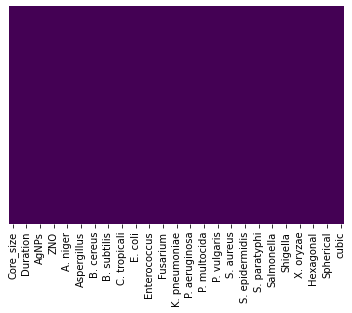

In [28]:
# visulize the data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
print(train.shape)

(371, 49)


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 411
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Core_size         371 non-null    float32
 1   Dose              371 non-null    float32
 2   Duration          371 non-null    float32
 3   ZOI               371 non-null    float64
 4   AgNPs             371 non-null    uint8  
 5   Fe3O4             371 non-null    uint8  
 6   ZNO               371 non-null    uint8  
 7   Uncoated          371 non-null    uint8  
 8   A. niger          371 non-null    uint8  
 9   A. terreus        371 non-null    uint8  
 10  Aspergillus       371 non-null    uint8  
 11  B. brevis         371 non-null    uint8  
 12  B. cereus         371 non-null    uint8  
 13  B. licheniformis  371 non-null    uint8  
 14  B. subtilis       371 non-null    uint8  
 15  C. albican        371 non-null    uint8  
 16  C. tropicali      371 non-null    uint8  
 1

In [31]:
# define feture and label 
x=train.drop('ZOI',axis=1)
y=train['ZOI']

In [32]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [33]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [34]:
# normalization
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [35]:
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [36]:
# define model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model = RandomForestRegressor()

In [37]:
# Train the model on training data
model.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
# define model evaluation method
from sklearn.model_selection import KFold

In [39]:
kf =KFold (n_splits=10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [40]:
for train, test in kf.split(train):
    print(train, test)

[ 38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 28

In [41]:
def get_score(model,x_train, x_test, y_train, y_test ):
    model.fit(x_train, y_train)
    return model.score(x_test,y_test)

In [42]:
get_score(RandomForestRegressor(),x_train, x_test, y_train, y_test )

0.7770808366148445

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from math import sqrt

In [ ]:
# Use the forest's predict method on the test data
y_pred = model.predict(x_test)

In [44]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_result

,Actual,Predicted
368,19.0,16.190000
33,16.0,14.860000
15,10.0,8.961000
355,21.0,17.630000
57,10.0,11.128333
...,...,...
209,15.0,12.240000
115,24.0,21.293333
303,40.0,34.250000
129,14.2,17.244000


In [52]:
# Print out the root mean squared error (rmse)
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test,y_pred )
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

4.387612766105965

In [53]:
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred)
print(errors)

2.8630602981029813


In [67]:
# Print out the mean squared error (mse)
mse= mean_squared_error(y_test,y_pred )
errors = mean_squared_error(y_test, y_pred)
print(errors)

19.251145785296035


In [51]:
# calculate the coefficient of determination
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 0.77
